# This code will be used to simulate our particle behaviour for varying parameters

In [1]:
# imports
import random
import numpy as np
from numba import jit
import matplotlib.pyplot as plt


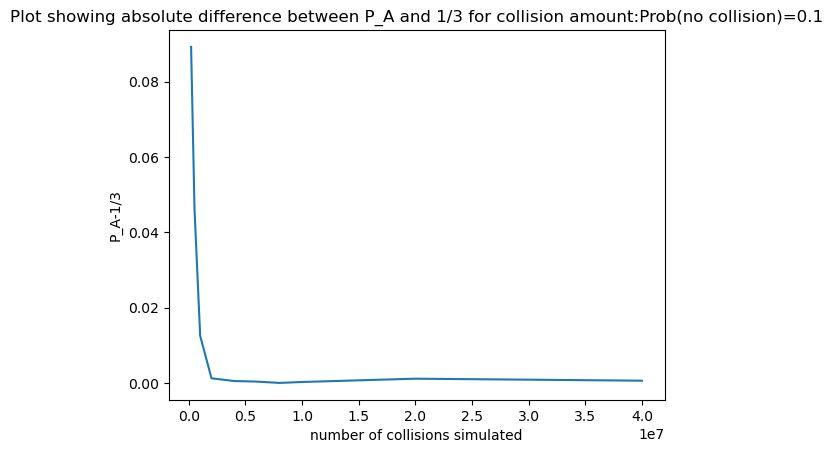

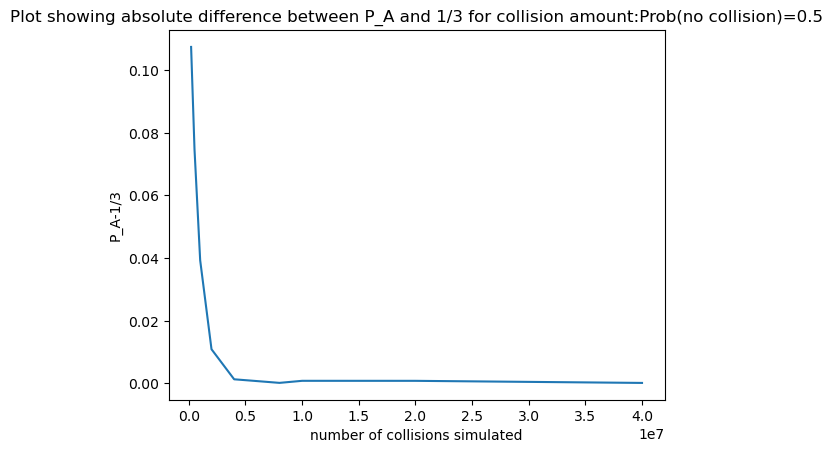

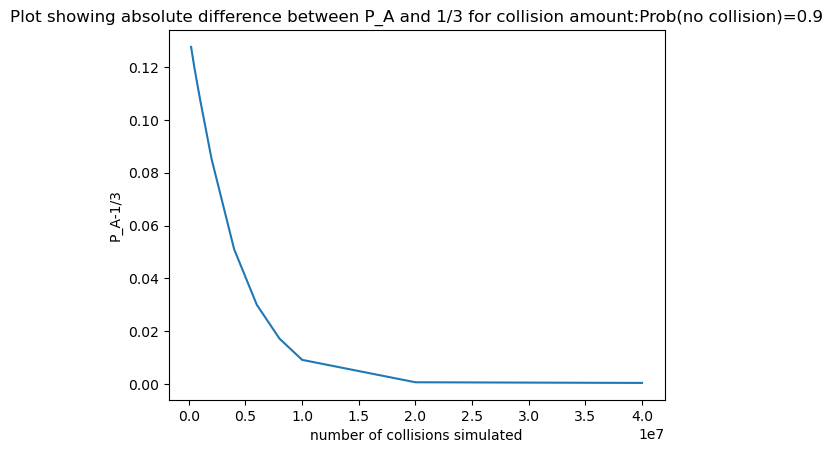

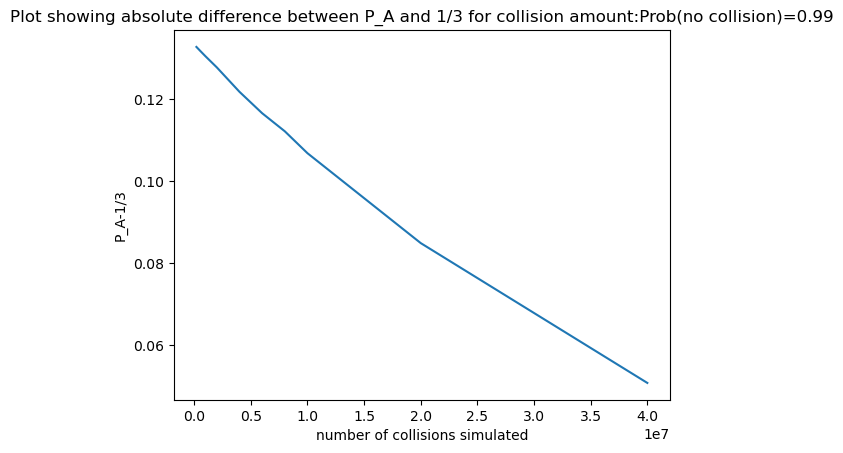

In [2]:
@jit(nopython = True,fastmath=True)
def sim1(I_A, I_B, I_C, steps,prob_no_coll):
    """
    In my first simulation code snippet I will say the probabilities of collisions between eg A,B are completely 
    dependent on the varying proportion of the collisions which are possible between ab vs total number of 
    non-trivial collisions
    
    Note here we are considering a collision occurs with probability 0.9

    """
#     list_of_prop_a=[]
#     list_of_prop_a.append(I_A/(I_A+I_B+I_C))
    steps_taken=0
    start_a = I_A
    start_b = I_B
    start_c = I_C
    for i in range(steps):
        steps_taken += 1
        
        
        rand = random.random()
        if random.random() > prob_no_coll:
            p_collision_ab = start_a * start_b / (start_a * start_b + start_a * start_c + start_b * start_c)
            p_collision_ac = start_a * start_c / (start_a * start_b + start_a * start_c + start_b * start_c)
            p_collision_bc = start_b * start_c / (start_a * start_b + start_a * start_c + start_b * start_c)
            if 0 < rand < p_collision_ab:
                start_c += 2
                start_a -= 1
                start_b -= 1
#                 list_of_prop_a.append(start_a/(I_A+I_B+I_C))
            elif p_collision_ab <= rand <= p_collision_ab + p_collision_ac:
                start_b += 2
                start_a -= 1
                start_c -= 1
#                 list_of_prop_a.append(start_a/(I_A+I_B+I_C))
            else:
                start_a += 2
                start_b -= 1
                start_c -= 1
#                 list_of_prop_a.append(start_a/(I_A+I_B+I_C))
    
    return(start_a,start_b,start_c,steps_taken)
#sim1(50000,900000,50000,1000000000)

def plots_conv(I_A,I_B,I_C,time_lengths,prob_no_coll):
    """
    Function to plot the proportion of final particles which are of type A with varying collision amounts. 
    """
    P_As = []
    
    for length in time_lengths:
        res = sim1(I_A, I_B, I_C, length,prob_no_coll)
        P_As.append(abs((res[0] / (I_A + I_B + I_C)-1/3)))
        
    plt.plot(time_lengths, P_As)
    plt.title(f"Plot showing absolute difference between P_A and 1/3 for collision amount:Prob(no collision)={prob_no_coll}")
    plt.xlabel("number of collisions simulated")
    plt.ylabel("P_A-1/3")
    plt.show()
    
plots_conv(200000,600000,200000,[200000,500000,1000000,2000000,4000000,6000000,8000000,10000000,20000000,40000000],0.1)
plots_conv(200000,600000,200000,[200000,500000,1000000,2000000,4000000,6000000,8000000,10000000,20000000,40000000],0.5)
plots_conv(200000,600000,200000,[200000,500000,1000000,2000000,4000000,6000000,8000000,10000000,20000000,40000000],0.9)
plots_conv(200000,600000,200000,[200000,500000,1000000,2000000,4000000,6000000,8000000,10000000,20000000,40000000],0.99)








# Now we consider 4 particles. We will simulate the process and see if an equilibrium state is achieved. 


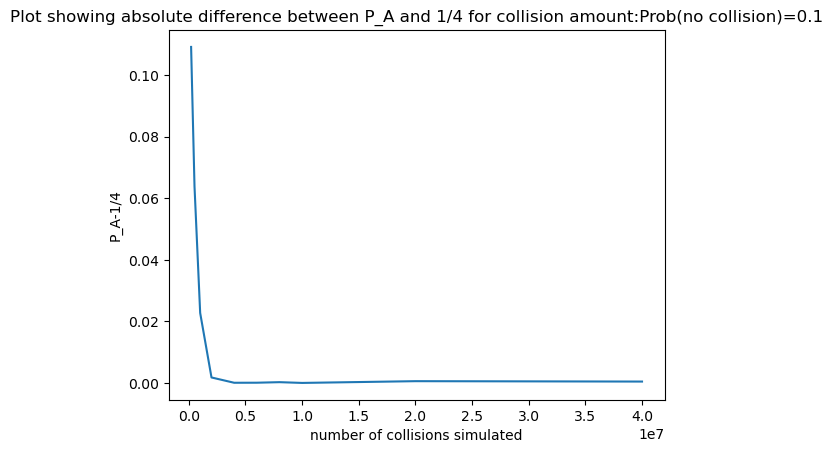

(249847, 249940, 250176, 250037, 10000000)

In [3]:
@jit(nopython=True,fastmath=True)
def sim_4_particles(I_A,I_B,I_C,I_D, steps,prob_no_coll):
    """
    In my first simulation code snippet I will say the probabilities of collisions between eg A,B are completely 
    dependent on the varying proportion of the collisions which are possible between ab vs total number of 
    non-trivial collisions
    
    Note here we are considering a collision occurs with probability 0.9

    """
#     num_particles=len(list_of_init_values)
#     collision_probs=[0 for i in range(num_particles*(num_particles-1)/2)]
#     starting_vals=[0 for i in range(len(list_of_init_values))]
#     for i in range(len(list_of_init_values)):
#         starting_vals[i]=list_of_init_values[i]
    steps_taken=0

    start_a = I_A
    start_b = I_B
    start_c = I_C
    start_d = I_D

    for i in range(steps):
        steps_taken += 1
        
        
        rand = random.random()
        
        if random.random() > prob_no_coll:
            p_collision_ab = start_a * start_b / (start_a * start_b + start_a * start_c + start_b * start_c+start_a * start_d+start_b * start_d+start_c * start_d)
            p_collision_ac = start_a * start_c / (start_a * start_b + start_a * start_c + start_b * start_c+start_a * start_d+start_b * start_d+start_c * start_d)
            p_collision_bc = start_b * start_c / (start_a * start_b + start_a * start_c + start_b * start_c+start_a * start_d+start_b * start_d+start_c * start_d)
            p_collision_ad = start_a * start_d / (start_a * start_b + start_a * start_c + start_b * start_c+start_a * start_d+start_b * start_d+start_c * start_d)
            p_collision_bd = start_b * start_d / (start_a * start_b + start_a * start_c + start_b * start_c+start_a * start_d+start_b * start_d+start_c * start_d)
            p_collision_cd = start_c * start_d / (start_a * start_b + start_a * start_c + start_b * start_c+start_a * start_d+start_b * start_d+start_c * start_d)
            if 0 < rand < p_collision_ab:
                if random.random()<0.5:
                    
                    start_c += 2
                    start_a -= 1
                    start_b -= 1
                else:
                    start_d += 2
                    start_a -= 1
                    start_b -= 1
            elif p_collision_ab <= rand <= p_collision_ab + p_collision_ac:
                if random.random()<0.5:
                    
                    start_b += 2
                    start_a -= 1
                    start_c -= 1
                else:
                    start_d += 2
                    start_a -= 1
                    start_c -= 1   
            elif p_collision_ab + p_collision_ac <= rand <= p_collision_ab + p_collision_ac+p_collision_ad:
                if random.random()<0.5:
                    
                    start_b += 2
                    start_a -= 1
                    start_d -= 1
                else:
                    start_c += 2
                    start_a -= 1
                    start_d -= 1 
                
            elif p_collision_ab + p_collision_ac+p_collision_ad <= rand <= p_collision_ab + p_collision_ac+p_collision_ad+p_collision_bc:
                if random.random()<0.5:
                    
                    start_a += 2
                    start_b -= 1
                    start_c -= 1
                else:
                    start_d += 2
                    start_b -= 1
                    start_c -= 1 
            elif p_collision_ab + p_collision_ac+p_collision_ad+p_collision_bc <= rand <= p_collision_ab + p_collision_ac+p_collision_ad+p_collision_bc+p_collision_bd:
                
                if random.random()<0.5:
                    
                    start_a += 2
                    start_b -= 1
                    start_d -= 1
                else:
                    start_c += 2
                    start_b -= 1
                    start_d -= 1 
            elif p_collision_ab + p_collision_ac+p_collision_ad+p_collision_bc+p_collision_bd <= rand <= p_collision_ab + p_collision_ac+p_collision_ad+p_collision_bc+p_collision_bd+p_collision_cd:
                if random.random()<0.5:
                    
                    start_b += 2
                    start_c -= 1
                    start_d -= 1
                else:
                    start_a += 2
                    start_c -= 1
                    start_d -= 1
    
    return(start_a,start_b,start_c,start_d,steps_taken)

def plots_conv2(I_A,I_B,I_C,I_D,time_lengths,prob_no_coll):
    """
    Function to plot the proportion of final particles which are of type A with varying collision amounts. 
    """
    P_As = []
    
    for length in time_lengths:
        res = sim_4_particles(I_A, I_B, I_C,I_D, length,prob_no_coll)
        P_As.append(abs((res[0] / (I_A + I_B + I_C+I_D)-1/4)))
        
    plt.plot(time_lengths, P_As)
    plt.title(f"Plot showing absolute difference between P_A and 1/4 for collision amount:Prob(no collision)={prob_no_coll}")
    plt.xlabel("number of collisions simulated")
    plt.ylabel("P_A-1/4")
    plt.show()
plots_conv2(100000,700000,100000,100000,[200000,500000,1000000,2000000,4000000,6000000,8000000,10000000,20000000,40000000],0.1)

sim_4_particles(100000,100000,700000,100000,10000000,0.1)

# As we can see the graph still shows convergence supporting our conjecture for general n. 